In [182]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [183]:
import pulp
from pulp import *

import numpy as np
import pandas as pd

import datetime
import matplotlib.pyplot as plt

## Load Data

In [184]:
df_distances = pd.read_csv('distances.csv')

df_drivers = pd.read_csv("part3_drivers.csv")
df = pd.read_csv("part3_small.csv")

In [185]:
df_distances.head()

,origin,destination,distance
0,Scarborough (Malvern / Rouge River),Scarborough (Rouge Hill / Port Union / Highlan...,3.931478
1,Scarborough (Malvern / Rouge River),Scarborough (Guildwood / Morningside / Ellesmere),4.864191
2,Scarborough (Malvern / Rouge River),Scarborough (Woburn),4.778347
3,Scarborough (Malvern / Rouge River),Scarborough (Cedarbrae),6.009861
4,Scarborough (Malvern / Rouge River),Scarborough (Eglinton),7.876162


In [186]:
df_drivers

,start region,velocity
0,Downtown Toronto (Richmond / Adelaide / King),40
1,Downtown Toronto (St. James Park),35
2,Downtown Toronto (Church and Wellesley),32


In [187]:
df

,restaurant,customer,estimated availability
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 5:17 PM
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 6:17 PM
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 5:53 PM
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 5:24 PM


In [216]:
start_time = pd.to_datetime('2022-04-02 17:00:00')
W = 55
W_range = range(0, 120, 5)

## Sets

In [188]:
vehicle = np.arange(0, len(df_drivers)).tolist() 
vehicle

[0, 1, 2]

In [189]:
starting_location = []
for v in vehicle:
    starting_location.append(df_drivers["start region"][v])
starting_location

['Downtown Toronto (Richmond / Adelaide / King)',
 'Downtown Toronto (St. James Park)',
 'Downtown Toronto (Church and Wellesley)']

In [190]:
# Get start and end locations
start_locations = list(df['restaurant'].unique()) + list(df['customer'].unique()) + starting_location
end_locations = list(df['customer'].unique())

start_locations = list(dict.fromkeys(start_locations))
end_locations = list(dict.fromkeys(end_locations))

# Calculate the number of stops 
num_stops = np.arange(0, len(start_locations)).tolist()

In [191]:
start_locations

['Downtown Toronto (Central Bay Street)',
 'Downtown Toronto (Christie)',
 'Downtown Toronto (Ryerson)',
 'Downtown Toronto (St. James Park)',
 'Downtown Toronto (Kensington Market / Chinatown / Grange Park)',
 'North York (Armour Heights / Wilson Heights / Downsview North)',
 'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
 'York (Fairbank / Oakwood)',
 'East Toronto (The Beaches)',
 'Downtown Toronto (Richmond / Adelaide / King)',
 'Downtown Toronto (Church and Wellesley)']

In [192]:
end_locations

['North York (Armour Heights / Wilson Heights / Downsview North)',
 'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
 'York (Fairbank / Oakwood)',
 'East Toronto (The Beaches)',
 'Downtown Toronto (Central Bay Street)']

In [193]:
num_stops

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [194]:
# Get unique Restraurants and Customers
restaurants = df['restaurant'].unique().tolist()
customers = df['customer'].unique().tolist()

In [195]:
restaurants

['Downtown Toronto (Central Bay Street)',
 'Downtown Toronto (Christie)',
 'Downtown Toronto (Ryerson)',
 'Downtown Toronto (St. James Park)',
 'Downtown Toronto (Kensington Market / Chinatown / Grange Park)']

In [196]:
customers

['North York (Armour Heights / Wilson Heights / Downsview North)',
 'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
 'York (Fairbank / Oakwood)',
 'East Toronto (The Beaches)',
 'Downtown Toronto (Central Bay Street)']

In [197]:
list_order = []
for index, row in df.iterrows():
    list_order.append([row["restaurant"], row["customer"]])
print(list_order)

[['Downtown Toronto (Central Bay Street)', 'North York (Armour Heights / Wilson Heights / Downsview North)'], ['Downtown Toronto (Christie)', 'West Toronto (Brockton / Parkdale Village / Exhibition Place)'], ['Downtown Toronto (Ryerson)', 'York (Fairbank / Oakwood)'], ['Downtown Toronto (St. James Park)', 'East Toronto (The Beaches)'], ['Downtown Toronto (Kensington Market / Chinatown / Grange Park)', 'Downtown Toronto (Central Bay Street)']]


## Parameters

In [198]:
travel_distance = {}

# Distance between start location and end location
for i in start_locations:
    for j in end_locations: 
        if i == j:
            travel_distance[(i,j)] = 0 
        else:
            travel_distance[(i,j)] = float(df_distances[(df_distances['origin'] == i) & 
                                                          (df_distances['destination'] == j)]['distance'])

In [199]:
travel_distance

{('Downtown Toronto (Central Bay Street)',
  'North York (Armour Heights / Wilson Heights / Downsview North)'): 11.864966858141472,
 ('Downtown Toronto (Central Bay Street)',
  'West Toronto (Brockton / Parkdale Village / Exhibition Place)'): 4.079376587918308,
 ('Downtown Toronto (Central Bay Street)',
  'York (Fairbank / Oakwood)'): 6.335424533286808,
 ('Downtown Toronto (Central Bay Street)',
  'East Toronto (The Beaches)'): 7.786167971519596,
 ('Downtown Toronto (Central Bay Street)',
  'Downtown Toronto (Central Bay Street)'): 0,
 ('Downtown Toronto (Christie)',
  'North York (Armour Heights / Wilson Heights / Downsview North)'): 9.713842509991242,
 ('Downtown Toronto (Christie)',
  'West Toronto (Brockton / Parkdale Village / Exhibition Place)'): 3.4240960245910577,
 ('Downtown Toronto (Christie)',
  'York (Fairbank / Oakwood)'): 3.3384583508697574,
 ('Downtown Toronto (Christie)',
  'East Toronto (The Beaches)'): 10.22770702998652,
 ('Downtown Toronto (Christie)',
  'Downtown To

In [200]:
velocity_min = {}
for v in vehicle:
    velocity_min[v] = df_drivers.iloc[v][1] / 60
velocity_min

{0: 0.6666666666666666, 1: 0.5833333333333334, 2: 0.5333333333333333}

In [201]:
travel_time = {}
average_wait = 5

# Time between start location and end location           
for i in start_locations:
    for j in end_locations: 
        for v in vehicle:
            # If at location, no wait unless it is the customer 
            if i == j:
                if i in customers:
                    travel_time[(i,j,v)] = average_wait
                else: 
                    travel_time[(i,j,v)] = 0 
                # Calculate travel time
            else: 
                if i in customers:
                    # Driver waits 5 minutes for customer to pick up order
                    travel_time[(i,j,v)] = travel_distance[(i,j)] * velocity_min[v] + average_wait
                else:
                    # Not at a customer location so no wait
                    travel_time[(i,j,v)] = travel_distance[(i,j)] * velocity_min[v] 

In [202]:
travel_time

{('Downtown Toronto (Central Bay Street)',
  'North York (Armour Heights / Wilson Heights / Downsview North)',
  0): 12.909977905427647,
 ('Downtown Toronto (Central Bay Street)',
  'North York (Armour Heights / Wilson Heights / Downsview North)',
  1): 11.921230667249192,
 ('Downtown Toronto (Central Bay Street)',
  'North York (Armour Heights / Wilson Heights / Downsview North)',
  2): 11.327982324342118,
 ('Downtown Toronto (Central Bay Street)',
  'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
  0): 7.7195843919455385,
 ('Downtown Toronto (Central Bay Street)',
  'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
  1): 7.379636342952346,
 ('Downtown Toronto (Central Bay Street)',
  'West Toronto (Brockton / Parkdale Village / Exhibition Place)',
  2): 7.175667513556431,
 ('Downtown Toronto (Central Bay Street)',
  'York (Fairbank / Oakwood)',
  0): 9.223616355524538,
 ('Downtown Toronto (Central Bay Street)',
  'York (Fairbank / Oakwood)',
  1): 8.69

In [219]:
minimum_arrival = {}

for j in end_locations:
    # Customer has no wait
    if j in customers: 
        minimum_arrival[j] = 0 
        
    # Restaurant has wait time 
    if j in restaurants:
        temp = pd.to_datetime(df.loc[df['restaurant'] == j]['estimated availability'].tolist()[0]) - start_time
        # Conver to minutes
        minimum_arrival[j] = temp / datetime.timedelta(minutes=1)

In [220]:
minimum_arrival

{'North York (Armour Heights / Wilson Heights / Downsview North)': 0,
 'West Toronto (Brockton / Parkdale Village / Exhibition Place)': 0,
 'York (Fairbank / Oakwood)': 0,
 'East Toronto (The Beaches)': 0,
 'Downtown Toronto (Central Bay Street)': 17.0}

## Model Setup

In [221]:
model = LpProblem(name = 'Model', sense = LpMinimize)

xVar = LpVariable.dict('x', (start_locations, end_locations, vehicle, num_stops), cat = LpBinary)
zVar = LpVariable.dict('z', (vehicle, num_stops), lowBound = 0.0, cat = LpContinuous)
dVar = LpVariable.dict('d', (vehicle, num_stops), lowBound = 0.0, cat = LpContinuous)
wVar = LpVariable.dict('w', (start_locations, vehicle, num_stops), lowBound = 0.0, cat = LpContinuous)

In [222]:
obj = lpSum([travel_distance[(i,j)] * xVar[(i,j,v,t)] for i in start_locations for j in end_locations for v in vehicle for t in num_stops])
model += obj

## Constraints

In [233]:
# 1. Convervation of flow, use ">=" as some drivers may end their tour earlier than step T
for v in vehicle:
    for t in num_stops[:-1]:
        for j in end_locations:
            model += (lpSum([xVar[(i,j,v,t)] for i in start_locations]) >= lpSum([xVar[(j,k,v,t+1)] for k in end_locations]))

# 2. Every location is visited once
for j in end_locations: 
    model += lpSum([xVar[(i,j,v,t)] for i in start_locations for v in vehicle for t in num_stops]) == 1
    
# 3. First node has an outflow of 1, others 0
for v in vehicle:
    for i in start_locations:
        if i == starting_location:
            model += lpSum([xVar[(i,j,v,0)] for j in end_locations]) == 1
        else: 
            model += lpSum([xVar[(i,j,v,0)] for j in end_locations]) == 0

# 4. Visit restaurant before customer
def restaurant_customer_match(customer):
    for order in list_order:
        if customer == order[1]:
            return order[0]

for v in vehicle:
    for t in num_stops:
        for j in end_locations:
            if j in customers:
                model += pulp.lpSum([xVar[i, j, v, t] for i in start_locations if (i, j, v, t) in xVar]) \
                         <= pulp.lpSum([xVar[i, restaurant_customer_match(j), v, t_] for i in start_locations for t_ in num_stops[:t] if (i, restaurant_customer_match(j), v, t_) in xVar])

# 5. Time to arrive at the location of the t-th step
for v in vehicle:
    for t in num_stops:
        if t == 0: 
            model += dVar[v,t] == lpSum([ xVar[(i,j,v,0)] * minimum_arrival[j] for i in start_locations for j in end_locations])
        else:
            model += dVar[v,t] >= (dVar[v,t-1] + lpSum([ xVar[(i,j,v,t)] * travel_time[(i,j,v)] for i in start_locations for j in end_locations]))
        
# 6. If arriving at location j, ensures time is at least minimum arrival time (Ij)
for v in vehicle:
    for i in start_locations:
        for j in end_locations:
            for t in num_stops:
                model += dVar[v,t] >= xVar[i,j,v,t] * minimum_arrival[j]
          
        
# 7. Add wait time of order per stop
for v in vehicle:
    for j in end_locations:
        for t in num_stops:
            if j in restaurants:
                model += wVar[(j, v, t)] == 0
            else:
                if restaurant_customer_match(j) in minimum_arrival:
                    model += wVar[(j, v, t)] == dVar[v, t] - pulp.lpSum([minimum_arrival[restaurant_customer_match(j)] * xVar[(i, j, v, t)] for i in start_locations if (i, j, v, t) in xVar])

# 8. If arriving at location j, ensures time is at most maximum arrival time (uj)      
# Formula Dt <= uj xijt + M(1-xijt)
M = 1000
for v in vehicle:
    for i in start_locations:
        for j in end_locations:
            for t in num_stops:
                if t == 0:
                    model += zVar[v,t] == 0 
                #elif t == 1:
                    #model += zVar[v,t] >= wVar[j,v,t] - M * (1 - xVar[(i,j,v,t)])
                    #model += zVar[v,t] <= wVar[j,v,t] + M * (1 - xVar[(i,j,v,t)])
                else: 
                    model += zVar[v,t] >= zVar[v,t-1] + wVar[(j,v,t)] - M * (1 - xVar[(i,j,v,t)])
                    model += zVar[v,t] <= zVar[v,t-1] + wVar[(j,v,t)] + M * (1 - xVar[(i,j,v,t)])

# 9. Time does not exceed max waiting time
for v in vehicle:
    for t in num_stops:
         model += pulp.lpSum(zVar[v,t]) <= W * len(customers)
        
# 10. For each stop, there shouled be at most 1 vehicle
for v in vehicle:
    for t in num_stops:
        model += pulp.lpSum(xVar[(i,j,v,t)] for i in start_locations for j in end_locations) <= 1

## Solve

In [234]:
# Solve the model
model.solve()
print("Status:", LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/12be6b7837b54a9e89bec015cc40d320-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/12be6b7837b54a9e89bec015cc40d320-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 23170 COLUMNS
At line 136532 RHS
At line 159698 BOUNDS
At line 161514 ENDATA
Problem MODEL has 23165 rows, 2037 columns and 108081 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.03 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.10   (Wallclock seconds):       0.13

Status: Infeasible


In [235]:
# Total Distance
total_distance = pulp.value(model.objective)
print("Total Distance: " , total_distance)

Total Distance:  4.855381505344139


In [236]:
# Print the results
path=[]
for t in num_stops:
    print(f'step:{t}\n')
    for i in start_locations:
         for j in end_locations:
                if (xVar[(i,j,t)].varValue == 1) :
                    print(f"TRAVEL FROM {i}  TO {j}")
                    print("\tWAITING TIME: " + str(wVar[(j,t)].varValue))
                    print("\tTOTAL WAITING TIME: " + str(zVar[t].varValue))
                    
                    if i not in path:
                        path.append(i)
                    if j not in path:
                        path.append(j)
print("\nAVERAGE WAITING TIME: " + str(zVar[t].varValue/len(customers)))

step:0



KeyError: ('Downtown Toronto (Central Bay Street)', 'North York (Armour Heights / Wilson Heights / Downsview North)', 0)

## Optimal W

In [110]:
def get_distance(W):
    model = LpProblem(name = "optimal_W", sense = LpMinimize)

    # 1. Convervation of flow
    for t in num_stops[:-1]:
        for j in end_locations:
            model += (lpSum([xVar[(i,j,t)] for i in start_locations]) == lpSum([xVar[(j,k,t+1)] for k in end_locations]))

    # 2. Every location is visited once
    for j in end_locations: 
        model += lpSum([xVar[(i,j,t)] for i in start_locations for t in num_stops]) == 1

    # 3. First node has an outflow of 1, others 0
    for i in start_locations:
        if i == starting_location:
            model += lpSum([xVar[(i,j,0)] for j in end_locations]) == 1
        else: 
            model += lpSum([xVar[(i,j,0)] for j in end_locations]) == 0

    # 4. Visit restaurant before customer
    for t in num_stops: 
        for j in end_locations: 
            if j in customers: 
                temp = restaurant_customer_match(j)
                model += lpSum( [xVar[i,j,t] for i in start_locations]) <= lpSum([xVar[i,temp,k] for i in start_locations for k in num_stops[:t]])

    # 5. Time to arrive at the location of the t-th
    for t in num_stops:
        if t == 0: 
            model += dVar[t] == lpSum([ xVar[(i,j,0)] * minimum_arrival[j] for i in start_locations for j in end_locations])
        else:
            model += dVar[t] >= (dVar[t-1] + lpSum([ xVar[(i,j,t)] * travel_time[(i,j)] for i in start_locations for j in end_locations]))

    # 6. Constraint: if arriving at location j, ensures time is at least the min_arrival_time_mins
    for i in start_locations:
        for j in end_locations:
            for t in num_stops:
                model += dVar[t] >= xVar[i,j,t] * minimum_arrival[j]


    # 7. Constraint: define waiting time of each order at num_stops t: wVar[j,t]
    for t in num_stops:
        for j in end_locations:
            if j in restaurants:
                model += wVar[(j,t)]  == 0
            else:
                model += wVar[(j,t)] == dVar[t] - lpSum([minimum_arrival[restaurant_customer_match(j)] * xVar[(i,j,t)] for i in start_locations])

    # If arriving at location j, ensures time is at most maximum arrival time (uj)        
    # Formula Dt <= uj xijt + M(1-xijt)
    M = 10000
    for i in start_locations:
        for j in end_locations:
            for t in num_stops:
                if t == 0:
                    model += zVar[t] == 0 
                elif t == 1:
                    model += zVar[t] >= wVar[j,t] - M * (1 - xVar[(i,j,t)])
                    model += zVar[t] <= wVar[j,t] + M * (1 - xVar[(i,j,t)])
                else: 
                    model += zVar[t] >= zVar[t-1] + wVar[(j,t)] - M * (1 - xVar[(i,j,t)])
                    model += zVar[t] <= zVar[t-1] + wVar[(j,t)] + M * (1 - xVar[(i,j,t)])

    # 8. Time does not exceed max waiting time
    for t in num_stops:
         model += zVar[t] <= W * len(customers)
            
    obj = lpSum([travel_distance[(i,j)] * xVar[(i,j,t)] for i in start_locations for j in end_locations for t in num_stops])
    model += obj
    
    optimal = model.solve()

    if optimal == 1:
        return value(model.objective)
    else:
        return 0 

In [111]:
different_w_distances = []

for W in test_W:
    different_w_distances.append(get_distance(W))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8a649221165a4ff98386219bd1488e03-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/8a649221165a4ff98386219bd1488e03-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 278 COLUMNS
At line 1530 RHS
At line 1804 BOUNDS
At line 1885 ENDATA
Problem MODEL has 273 rows, 104 columns and 1027 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12.795 - 0.00 seconds
Cgl0002I 18 variables fixed
Cgl0003I 37 fixed, 0 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0000I Cut generators found to be infeasible! (or unbounded)
Pre-processing says infeasible or unbounded
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Welcome to the CBC

Text(0.5, 1.0, 'Trade-off Curve')

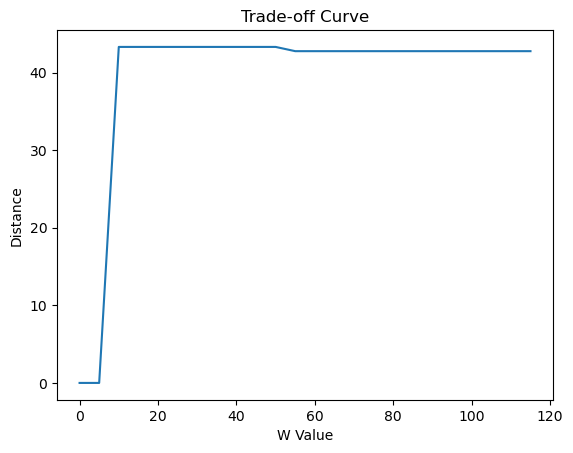

In [112]:
plt.plot(test_W, different_w_distances)
plt.xlabel("W Value")
plt.ylabel("Distance")
plt.title("Trade-off Curve")